# Загружаем библиотеки

In [1]:
!pip install pandas_ta

In [2]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import math

import datetime
import dateutil
import statistics

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
from datetime import timedelta, timezone

In [3]:
df=pd.read_csv('agg_ONTUSDT_2024-04-19.csv', sep=',')
df.drop('Unnamed: 0', axis= 1 , inplace= True )

#указываем цену
df['Price_alert'] = 0.3313

In [4]:
df.head(10)

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert
0,1713480300000,0.3349,0.3349,0.3348,0.3348,16792.6,3,1713484855000,0.3313
1,1713480360000,0.3349,0.3356,0.3346,0.3350,188066.7,89,1713484855000,0.3313
2,1713480420000,0.3351,0.3353,0.3341,0.3341,269036.0,95,1713484855000,0.3313
3,1713480480000,0.3341,0.3342,0.3333,0.3335,461506.6,89,1713484855000,0.3313
4,1713480540000,0.3334,0.3337,0.3327,0.3330,360699.7,97,1713484855000,0.3313
5,1713480600000,0.3331,0.3337,0.3329,0.3333,269642.3,77,1713484855000,0.3313
6,1713480660000,0.3334,0.3347,0.3334,0.3342,193934.0,85,1713484855000,0.3313
7,1713480720000,0.3342,0.3345,0.3341,0.3341,172847.2,72,1713484855000,0.3313
8,1713480780000,0.3340,0.3344,0.3336,0.3338,205432.9,92,1713484855000,0.3313
9,1713480840000,0.3339,0.3346,0.3323,0.3326,498037.1,145,1713484855000,0.3313


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              256 non-null    int64  
 1   Open              256 non-null    float64
 2   High              256 non-null    float64
 3   Low               256 non-null    float64
 4   Close             256 non-null    float64
 5   Volume            256 non-null    float64
 6   Number of trades  256 non-null    int64  
 7   Time_alert        256 non-null    int64  
 8   Price_alert       256 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 18.1 KB


In [6]:
def get_formatted_time(timestamp):
    """Переврдит метку времени в дату-время МОСКОВСКОЕ!"""
    dt_object = dt.fromtimestamp(float(timestamp) / 1000.0 + 3 * 60 * 60,
                                 timezone.utc)
    return dt_object

def ts2dt(timestamp):
    """Переврдит метку времени в строку дату-время МОСКОВСКОЕ!"""
    dt_object = dt.fromtimestamp(float(timestamp) / 1000.0 + 3 * 60 * 60,
                                 timezone.utc)
    time_str = dt_object.strftime("%Y-%m-%d %H:%M:%S").partition("+")[0]
    return time_str

In [7]:
df['Time'] = df['Time'].apply(ts2dt)
df['Time_alert'] = df['Time_alert'].apply(ts2dt)

In [8]:
df.head()

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:00:55,0.3313
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:00:55,0.3313
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:00:55,0.3313
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:00:55,0.3313
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:00:55,0.3313


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              256 non-null    object 
 1   Open              256 non-null    float64
 2   High              256 non-null    float64
 3   Low               256 non-null    float64
 4   Close             256 non-null    float64
 5   Volume            256 non-null    float64
 6   Number of trades  256 non-null    int64  
 7   Time_alert        256 non-null    object 
 8   Price_alert       256 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 18.1+ KB


In [10]:
df['Time']=pd.to_datetime(df['Time'])
df['Time_alert']=pd.to_datetime(df['Time_alert']).dt.round('1T')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              256 non-null    datetime64[ns]
 1   Open              256 non-null    float64       
 2   High              256 non-null    float64       
 3   Low               256 non-null    float64       
 4   Close             256 non-null    float64       
 5   Volume            256 non-null    float64       
 6   Number of trades  256 non-null    int64         
 7   Time_alert        256 non-null    datetime64[ns]
 8   Price_alert       256 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 18.1 KB


In [12]:
df.head()

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:01:00,0.3313
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:01:00,0.3313
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:01:00,0.3313
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:01:00,0.3313
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:01:00,0.3313


## Скользящее среднее, скользящее стандартное отклонение

In [13]:
df['Av_price'] = (df['High']+df['Low'])/2
df['Rolling_mean'] = df['Av_price'].rolling(5).mean() #скользящее среднее
df['Rolling_std'] = df['Av_price'].rolling(5).std() #скользящее стандартное отклонение

In [14]:
df.head()

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert,Av_price,Rolling_mean,Rolling_std
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:01:00,0.3313,0.33485,NaN,NaN
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:01:00,0.3313,0.33510,NaN,NaN
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:01:00,0.3313,0.33470,NaN,NaN
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:01:00,0.3313,0.33375,NaN,NaN
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:01:00,0.3313,0.33320,0.33432,0.000808


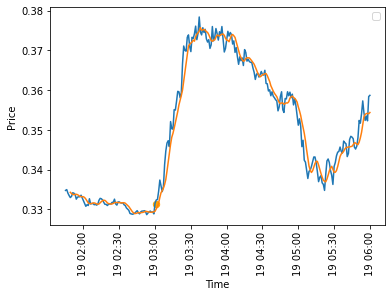

In [15]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']
plt.plot(df['Time'], df['Close'])
plt.plot(df['Time'], df['Rolling_mean'])
plt.figsize=(20, 30)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.legend('')
plt.ylabel('Price')
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o');

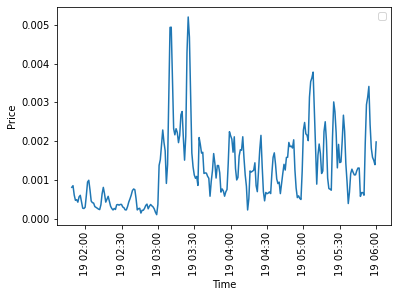

In [16]:
plt.plot(df['Time'], df['Rolling_std'])
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.legend('')
plt.ylabel('Price');

## Цена начала отрезка, цена окончания отрезка (до точки alert)

In [17]:
def start_rolling_mean(row):

  time_alert=df.loc[0,'Time_alert']

  if row['Time'] <= (time_alert-pd.Timedelta(minutes=15)):
    return df.loc[4,'Rolling_mean']



In [18]:
df['Start_rolling_mean'] = df.apply(start_rolling_mean, axis=1)

In [19]:
def end_rolling_mean(row):

  time_alert=df.loc[0,'Time_alert']

  if row['Time'] <= (time_alert-pd.Timedelta(minutes=15)):
        index_time = df.index [df['Time'] == (time_alert-pd.Timedelta(minutes=15))].tolist()
        return df.loc[index_time,'Rolling_mean']

In [20]:
df['End_rolling_mean'] = df.apply(end_rolling_mean, axis=1)

## RSI индекс относительной силы

In [21]:
df['RSI'] = ta.rsi(df['Close'], length = 5)

In [22]:
df.head()

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert,Av_price,Rolling_mean,Rolling_std,Start_rolling_mean,End_rolling_mean,RSI
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:01:00,0.3313,0.33485,NaN,NaN,0.33432,0.32923,NaN
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:01:00,0.3313,0.33510,NaN,NaN,0.33432,0.32923,NaN
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:01:00,0.3313,0.33470,NaN,NaN,0.33432,0.32923,NaN
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:01:00,0.3313,0.33375,NaN,NaN,0.33432,0.32923,NaN
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:01:00,0.3313,0.33320,0.33432,0.000808,0.33432,0.32923,NaN


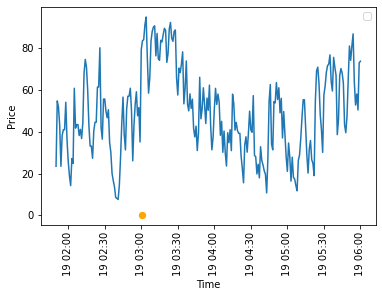

In [23]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']
plt.plot(df['Time'], df['RSI'])
plt.figsize=(20, 30)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.legend('')
plt.ylabel('Price')
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o');

## Определение направления движения. Абсолютное изменение цены

In [24]:
df['Lag_price'] = df['Av_price'].shift(1)
df['Diff_price'] = ((df['Av_price'] - df['Lag_price'])/df['Lag_price'])*100

In [25]:
df.head()

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert,Av_price,Rolling_mean,Rolling_std,Start_rolling_mean,End_rolling_mean,RSI,Lag_price,Diff_price
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:01:00,0.3313,0.33485,NaN,NaN,0.33432,0.32923,NaN,NaN,NaN
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:01:00,0.3313,0.33510,NaN,NaN,0.33432,0.32923,NaN,0.33485,0.074660
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:01:00,0.3313,0.33470,NaN,NaN,0.33432,0.32923,NaN,0.33510,-0.119367
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:01:00,0.3313,0.33375,NaN,NaN,0.33432,0.32923,NaN,0.33470,-0.283836
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:01:00,0.3313,0.33320,0.33432,0.000808,0.33432,0.32923,NaN,0.33375,-0.164794


## Vortex

In [26]:
vortex = ta.vortex(high=df['High'], low=df['Low'], close=df['Close'], window=5)

In [27]:
df = pd.concat([df, vortex], axis=1)
df.head(20)

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert,Av_price,Rolling_mean,Rolling_std,Start_rolling_mean,End_rolling_mean,RSI,Lag_price,Diff_price,VTXP_14,VTXM_14
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:01:00,0.3313,0.33485,NaN,NaN,0.33432,0.32923,NaN,NaN,NaN,NaN,NaN
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:01:00,0.3313,0.33510,NaN,NaN,0.33432,0.32923,NaN,0.33485,0.074660,NaN,NaN
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:01:00,0.3313,0.33470,NaN,NaN,0.33432,0.32923,NaN,0.33510,-0.119367,NaN,NaN
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:01:00,0.3313,0.33375,NaN,NaN,0.33432,0.32923,NaN,0.33470,-0.283836,NaN,NaN
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:01:00,0.3313,0.33320,0.33432,0.000808,0.33432,0.32923,NaN,0.33375,-0.164794,NaN,NaN
5,2024-04-19 01:50:00,0.3331,0.3337,0.3329,0.3333,269642.3,77,2024-04-19 03:01:00,0.3313,0.33330,0.33401,0.000850,0.33432,0.32923,23.477919,0.33320,0.030012,NaN,NaN
6,2024-04-19 01:51:00,0.3334,0.3347,0.3334,0.3342,193934.0,85,2024-04-19 03:01:00,0.3313,0.33405,0.33380,0.000609,0.33432,0.32923,54.762839,0.33330,0.225023,NaN,NaN
7,2024-04-19 01:52:00,0.3342,0.3345,0.3341,0.3341,172847.2,72,2024-04-19 03:01:00,0.3313,0.33430,0.33372,0.000472,0.33432,0.32923,51.820342,0.33405,0.074839,NaN,NaN
8,2024-04-19 01:53:00,0.3340,0.3344,0.3336,0.3338,205432.9,92,2024-04-19 03:01:00,0.3313,0.33400,0.33377,0.000489,0.33432,0.32923,43.129934,0.33430,-0.089740,NaN,NaN
9,2024-04-19 01:54:00,0.3339,0.3346,0.3323,0.3326,498037.1,145,2024-04-19 03:01:00,0.3313,0.33345,0.33382,0.000425,0.33432,0.32923,23.459138,0.33400,-0.164671,NaN,NaN


## Интервалы 10 минут

In [28]:
#точка алерт
time_alert=df.loc[0,'Time_alert']
time_alert

Timestamp('2024-04-19 03:01:00')

In [29]:
x=10 #интервал в минутах
c=math.ceil(df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=300), time_alert-pd.Timedelta(minutes=1))].shape[0]/x)
c

8

In [30]:
# до точки alert
for i in range(0, c+1):

  price_change = df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].count()

  if price_change>0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=2
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif price_change<-0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=-2
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif 0.02 <= price_change<=0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=1
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif -0.1 <= price_change<=-0.02:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=-1
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  else:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=0
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  print(price_change)

0.01522865324176571
0.027366720422396053
-0.08924373076133485
0.01967626556762669
-0.008969274253398583
-0.04205636493603766
-0.014928698610828873
-0.09266506627012217
nan


/tmp/ipykernel_84/4225532489.py:4: RuntimeWarning: invalid value encountered in double_scalars
  price_change = df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].count()


In [31]:
#Vortex

for i in range(0, c+1):

  vortex_change = df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['VTXP_14'].mean() - df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['VTXM_14'].mean()

  if vortex_change>0.45:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down_vortex']=2
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Vortex_ch']=vortex_change

  elif vortex_change<-0.45:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down_vortex']=-2
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Vortex_ch']=vortex_change

  elif 0.2 <= vortex_change<=0.45:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down_vortex']=1
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Vortex_ch']=vortex_change

  elif -0.45 <= vortex_change<=-0.2:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down_vortex']=-1
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Vortex_ch']=vortex_change

  else:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down_vortex']=0
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Vortex_ch']=vortex_change

  print(vortex_change)

0.0260986581851389
-0.4867099459590247
-0.1743599355668004
-0.028896554684736953
-0.06390251527062629
-0.31293716170655383
-0.2773266022827062
nan
nan


После точки alert

In [32]:
c_after=math.ceil(df.loc[df['Time'].between(time_alert, time_alert+pd.Timedelta(minutes=300))].shape[0]/x)
c_after

18

In [33]:
for i in range(0, c_after+1):

  price_change = df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].count()

  if price_change>0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=2
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif price_change<-0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=-2
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif 0.02 <= price_change<=0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=1
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif -0.1 <= price_change<=-0.02:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=-1
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  else:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=0
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  print(price_change)

0.43904914763306685
0.3129818079987296
0.31750235670121796
0.07567076846572225
-0.020092600462679425
0.04351679389320668
-0.10857159543597888
0.02266244859184581
-0.055496969642952365
-0.1518716746251406
0.029171294956919325
-0.12233561952632989
-0.3138035679176634
-0.09213296074495009
0.10067840481728975
0.17229986652960017
0.10011036675886537
0.3187652592328697
nan


/tmp/ipykernel_84/542566709.py:3: RuntimeWarning: invalid value encountered in double_scalars
  price_change = df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].count()


In [34]:
#Vortex

for i in range(0, c_after+1):

  vortex_change = df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['VTXP_14'].mean() - df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['VTXM_14'].mean()

  if vortex_change>0.45:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down_vortex']=2
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Vortex_ch']=vortex_change

  elif vortex_change<-0.45:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down_vortex']=-2
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Vortex_ch']=vortex_change

  elif 0.2 <= vortex_change<=0.45:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down_vortex']=1
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Vortex_ch']=vortex_change

  elif -0.45 <= vortex_change<=-0.2:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down_vortex']=-1
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Vortex_ch']=vortex_change

  else:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down_vortex']=0
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Vortex_ch']=vortex_change

  print(vortex_change)

0.6320639779500412
0.75625638921168
0.6768254213394829
0.35371508420747133
-0.009002516725820309
-0.02739250152914907
-0.0898991650265063
-0.24641875122655532
-0.21835324821962998
-0.28354030493105287
-0.32468216257908766
-0.051136244283414456
-0.5284528301688196
-0.43995580196120254
-0.063018632362692
0.27940576247546733
0.24780126425551818
0.3734473476125285
nan


In [35]:
df.head()

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert,Av_price,...,End_rolling_mean,RSI,Lag_price,Diff_price,VTXP_14,VTXM_14,Up_down,Price_ch,Up_down_vortex,Vortex_ch
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:01:00,0.3313,0.33485,...,0.32923,NaN,NaN,NaN,NaN,NaN,-1.0,-0.092665,0.0,NaN
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:01:00,0.3313,0.33510,...,0.32923,NaN,0.33485,0.074660,NaN,NaN,-1.0,-0.092665,0.0,NaN
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:01:00,0.3313,0.33470,...,0.32923,NaN,0.33510,-0.119367,NaN,NaN,-1.0,-0.092665,0.0,NaN
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:01:00,0.3313,0.33375,...,0.32923,NaN,0.33470,-0.283836,NaN,NaN,-1.0,-0.092665,0.0,NaN
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:01:00,0.3313,0.33320,...,0.32923,NaN,0.33375,-0.164794,NaN,NaN,-1.0,-0.092665,0.0,NaN


## Графики 10 минут

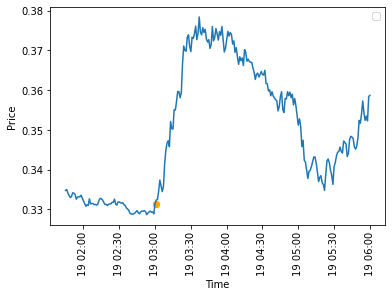

In [36]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']
plt.plot(df['Time'], df['Close'])
plt.figsize=(20, 30)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.legend('')
plt.ylabel('Price')
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o');

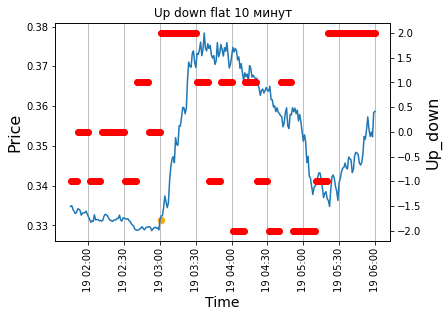

In [37]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(axis='x')

ax2 = ax.twinx ()

ax2.scatter(df.Time , df.Up_down, c='red')
ax2.set_ylabel('Up_down', fontsize= 16)
plt.title('Up down flat 10 минут');

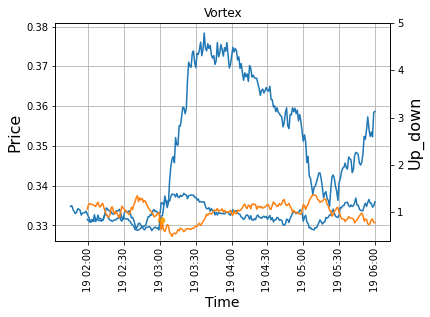

In [38]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(True)

ax2 = ax.twinx ()

ax2.plot(df.Time , df.VTXP_14)
ax2.plot(df.Time , df.VTXM_14)
ax2.set_ylabel('Up_down', fontsize= 16)
plt.ylim(0.4,5)
plt.title('Vortex');

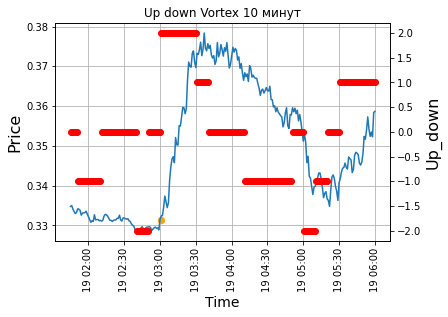

In [39]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(True)

ax2 = ax.twinx ()

ax2.scatter(df.Time , df.Up_down_vortex, c='red')
ax2.set_ylabel('Up_down', fontsize= 16)
plt.title('Up down Vortex 10 минут');

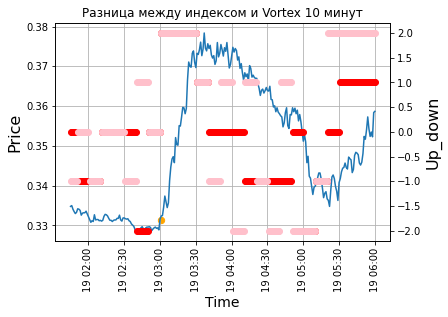

In [40]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(True)

ax2 = ax.twinx ()

ax2.scatter(df.Time , df.Up_down_vortex, c='red')
ax2.scatter(df.Time , df.Up_down, c='pink')
ax2.set_ylabel('Up_down', fontsize= 16)
plt.title('Разница между индексом и Vortex 10 минут');

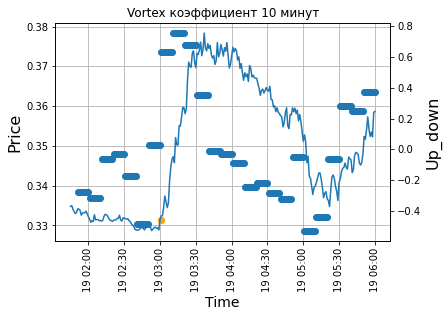

In [41]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(True)

ax2 = ax.twinx ()

ax2.scatter(df.Time , df.Vortex_ch)
ax2.set_ylabel('Up_down', fontsize= 16)
plt.title('Vortex коэффициент 10 минут');

## Интервалы 15 минут

In [42]:
#точка алерт
time_alert=df.loc[0,'Time_alert']
time_alert

Timestamp('2024-04-19 03:01:00')

In [43]:
x=10 #интервал в минутах
c=math.ceil(df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=300), time_alert-pd.Timedelta(minutes=1))].shape[0]/x)
c

8

In [44]:
for i in range(0, c+1):

  price_change = df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].count()

  if price_change>0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=2
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif price_change<-0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=-2
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif 0.02 <= price_change<=0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=1
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif -0.1 <= price_change<=-0.02:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=-1
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  else:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=0
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  print(price_change)

0.01522865324176571
0.027366720422396053
-0.08924373076133485
0.01967626556762669
-0.008969274253398583
-0.04205636493603766
-0.014928698610828873
-0.09266506627012217
nan


/tmp/ipykernel_84/1922886160.py:3: RuntimeWarning: invalid value encountered in double_scalars
  price_change = df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].count()


После точки alert

In [45]:
c_after=math.ceil(df.loc[df['Time'].between(time_alert, time_alert+pd.Timedelta(minutes=300))].shape[0]/x)
c_after

18

In [46]:
for i in range(0, c_after+1):

  price_change = df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].count()

  if price_change>0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=2
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif price_change<-0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=-2
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif 0.02 <= price_change<=0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=1
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif -0.1 <= price_change<=-0.02:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=-1
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  else:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=0
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  print(price_change)

0.43904914763306685
0.3129818079987296
0.31750235670121796
0.07567076846572225
-0.020092600462679425
0.04351679389320668
-0.10857159543597888
0.02266244859184581
-0.055496969642952365
-0.1518716746251406
0.029171294956919325
-0.12233561952632989
-0.3138035679176634
-0.09213296074495009
0.10067840481728975
0.17229986652960017
0.10011036675886537
0.3187652592328697
nan


/tmp/ipykernel_84/542566709.py:3: RuntimeWarning: invalid value encountered in double_scalars
  price_change = df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].count()


In [47]:
df.head()

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert,Av_price,...,End_rolling_mean,RSI,Lag_price,Diff_price,VTXP_14,VTXM_14,Up_down,Price_ch,Up_down_vortex,Vortex_ch
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:01:00,0.3313,0.33485,...,0.32923,NaN,NaN,NaN,NaN,NaN,-1.0,-0.092665,0.0,NaN
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:01:00,0.3313,0.33510,...,0.32923,NaN,0.33485,0.074660,NaN,NaN,-1.0,-0.092665,0.0,NaN
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:01:00,0.3313,0.33470,...,0.32923,NaN,0.33510,-0.119367,NaN,NaN,-1.0,-0.092665,0.0,NaN
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:01:00,0.3313,0.33375,...,0.32923,NaN,0.33470,-0.283836,NaN,NaN,-1.0,-0.092665,0.0,NaN
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:01:00,0.3313,0.33320,...,0.32923,NaN,0.33375,-0.164794,NaN,NaN,-1.0,-0.092665,0.0,NaN


## Графики 15 минут

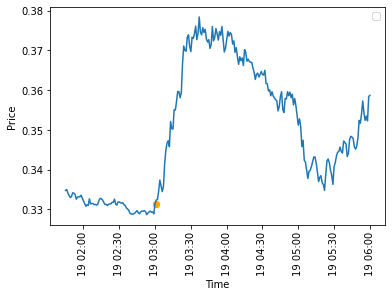

In [48]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']
plt.plot(df['Time'], df['Close'])
plt.figsize=(20, 30)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.legend('')
plt.ylabel('Price')
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o');

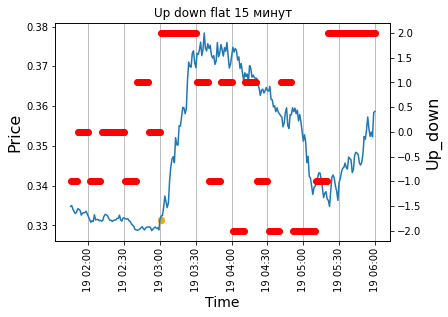

In [49]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(axis='x')

ax2 = ax.twinx ()

ax2.scatter(df.Time , df.Up_down, c='red')
ax2.set_ylabel('Up_down', fontsize= 16)
plt.title('Up down flat 15 минут');

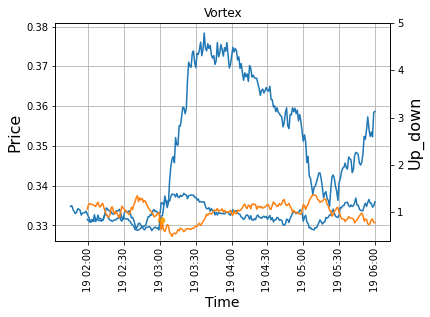

In [50]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(True)

ax2 = ax.twinx ()

ax2.plot(df.Time , df.VTXP_14)
ax2.plot(df.Time , df.VTXM_14)
ax2.set_ylabel('Up_down', fontsize= 16)
plt.ylim(0.4,5)
plt.title('Vortex');

## Интервалы и графики 30 минут

In [51]:
#точка алерт
time_alert=df.loc[0,'Time_alert']
time_alert

Timestamp('2024-04-19 03:01:00')

In [52]:
x=30 #интервал в минутах
c=math.ceil(df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=300), time_alert-pd.Timedelta(minutes=1))].shape[0]/x)
c

3

In [53]:
for i in range(0, c+1):

  price_change = df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].count()

  if price_change>0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=2
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif price_change<-0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=-2
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif 0.02 <= price_change<=0.1:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=1
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  elif -0.1 <= price_change<=-0.02:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=-1
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  else:
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Up_down']=0
    df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x))), 'Price_ch']=price_change

  print(price_change)

-0.015549452365724359
-0.010449791207269849
-0.04084082116392664
nan


/tmp/ipykernel_84/1922886160.py:3: RuntimeWarning: invalid value encountered in double_scalars
  price_change = df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert-pd.Timedelta(minutes=((i+1)*x)), time_alert-pd.Timedelta(minutes=1)-pd.Timedelta(minutes=(i*x)))]['Diff_price'].count()


После точки alert

In [54]:
c_after=math.ceil(df.loc[df['Time'].between(time_alert, time_alert+pd.Timedelta(minutes=300))].shape[0]/x)
c_after

6

In [55]:
for i in range(0, c_after+1):

  price_change = df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].count()

  if price_change>0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=2
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif price_change<-0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=-2
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif 0.02 <= price_change<=0.1:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=1
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  elif -0.1 <= price_change<=-0.02:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=-1
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  else:
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Up_down']=0
    df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x))), 'Price_ch']=price_change

  print(price_change)

0.39028912532637067
0.024751893501382415
-0.06777578231642858
-0.10770815095981319
-0.0992044394926672
0.18207006737426032
nan


/tmp/ipykernel_84/542566709.py:3: RuntimeWarning: invalid value encountered in double_scalars
  price_change = df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].sum()/df.loc[df['Time'].between(time_alert+pd.Timedelta(minutes=(i*x)), time_alert+pd.Timedelta(minutes=((i+1)*x)))]['Diff_price'].count()


In [56]:
df.head()

,Time,Open,High,Low,Close,Volume,Number of trades,Time_alert,Price_alert,Av_price,...,End_rolling_mean,RSI,Lag_price,Diff_price,VTXP_14,VTXM_14,Up_down,Price_ch,Up_down_vortex,Vortex_ch
0,2024-04-19 01:45:00,0.3349,0.3349,0.3348,0.3348,16792.6,3,2024-04-19 03:01:00,0.3313,0.33485,...,0.32923,NaN,NaN,NaN,NaN,NaN,-1.0,-0.040841,0.0,NaN
1,2024-04-19 01:46:00,0.3349,0.3356,0.3346,0.3350,188066.7,89,2024-04-19 03:01:00,0.3313,0.33510,...,0.32923,NaN,0.33485,0.074660,NaN,NaN,-1.0,-0.040841,0.0,NaN
2,2024-04-19 01:47:00,0.3351,0.3353,0.3341,0.3341,269036.0,95,2024-04-19 03:01:00,0.3313,0.33470,...,0.32923,NaN,0.33510,-0.119367,NaN,NaN,-1.0,-0.040841,0.0,NaN
3,2024-04-19 01:48:00,0.3341,0.3342,0.3333,0.3335,461506.6,89,2024-04-19 03:01:00,0.3313,0.33375,...,0.32923,NaN,0.33470,-0.283836,NaN,NaN,-1.0,-0.040841,0.0,NaN
4,2024-04-19 01:49:00,0.3334,0.3337,0.3327,0.3330,360699.7,97,2024-04-19 03:01:00,0.3313,0.33320,...,0.32923,NaN,0.33375,-0.164794,NaN,NaN,-1.0,-0.040841,0.0,NaN


## Графики 30 минут

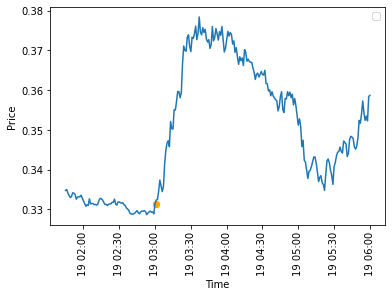

In [57]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']
plt.plot(df['Time'], df['Close'])
plt.figsize=(20, 30)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.legend('')
plt.ylabel('Price')
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o');

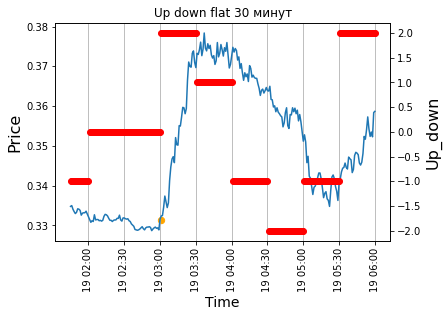

In [58]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']


fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(axis='x')

ax2 = ax.twinx ()

ax2.scatter(df.Time , df.Up_down, c='red')
ax2.set_ylabel('Up_down', fontsize= 16)
plt.title('Up down flat 30 минут');

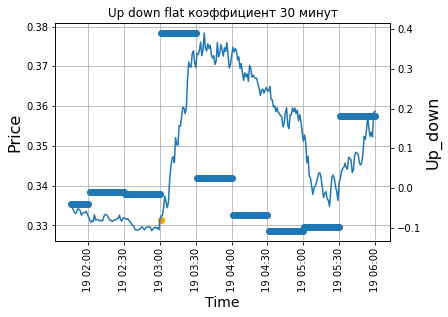

In [59]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(True)

ax2 = ax.twinx ()

ax2.scatter(df.Time , df.Price_ch)
ax2.set_ylabel('Up_down', fontsize= 16)
plt.title('Up down flat коэффициент 30 минут');


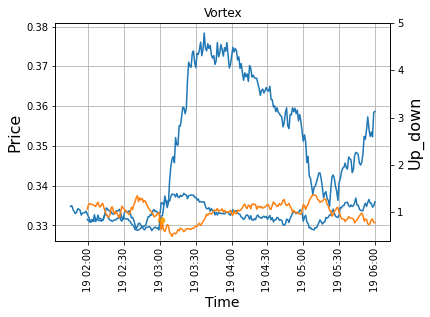

In [60]:
alert_time=df.loc[0,'Time_alert']
alert_price=df.loc[0,'Price_alert']

fig,ax = plt.subplots()

ax.plot(df.Time , df.Close)
ax.set_xlabel('Time', fontsize= 14 )
ax.set_ylabel('Price', fontsize= 16 )
plt.xticks(rotation=90)
plt.scatter(alert_time, alert_price, color='orange', s=40, marker='o')
plt.grid(True)

ax2 = ax.twinx ()

ax2.plot(df.Time , df.VTXP_14)
ax2.plot(df.Time , df.VTXM_14)
ax2.set_ylabel('Up_down', fontsize= 16)
plt.ylim(0.4,5)
plt.title('Vortex');